#Heart Disease Prediction Using ML Models

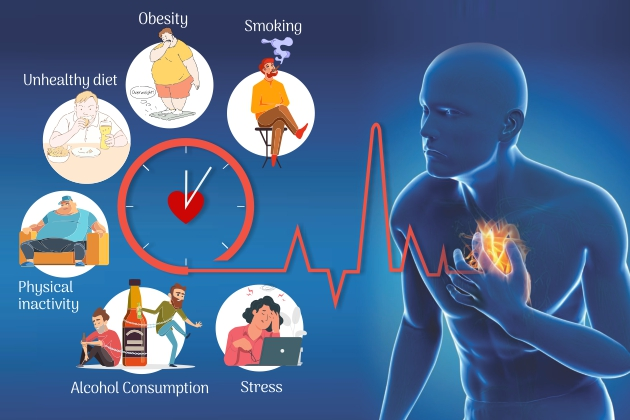

#Read Data

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")

print("Path to dataset files:", path)

100%|██████████| 21.4M/21.4M [00:00<00:00, 62.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/versions/6


In [2]:
import pandas as pd
import numpy as np
import os

csv_path = os.path.join(path, "2020", "heart_2020_cleaned.csv")
data = pd.read_csv(csv_path)

# Preview the data
data.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from sklearn import linear_model
import matplotlib.pyplot as plot
import warnings
warnings.filterwarnings("ignore")

#1.Data Preprocessing (Check Null , Data Type , duplicates , See The Correct Form Of Data)

In [4]:
data.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
data.shape

(319795, 18)

In [6]:
data.isna().sum()


,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [7]:
data.duplicated().sum()


np.int64(18078)

In [8]:
data.drop_duplicates(inplace=True)


In [ ]:
data.shape

(301717, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

we should make balancing techniques 1.smot but its not good idea

In [ ]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [ ]:
count_target = data['HeartDisease'].value_counts()
count_target

,count
HeartDisease,
No,274456
Yes,27261


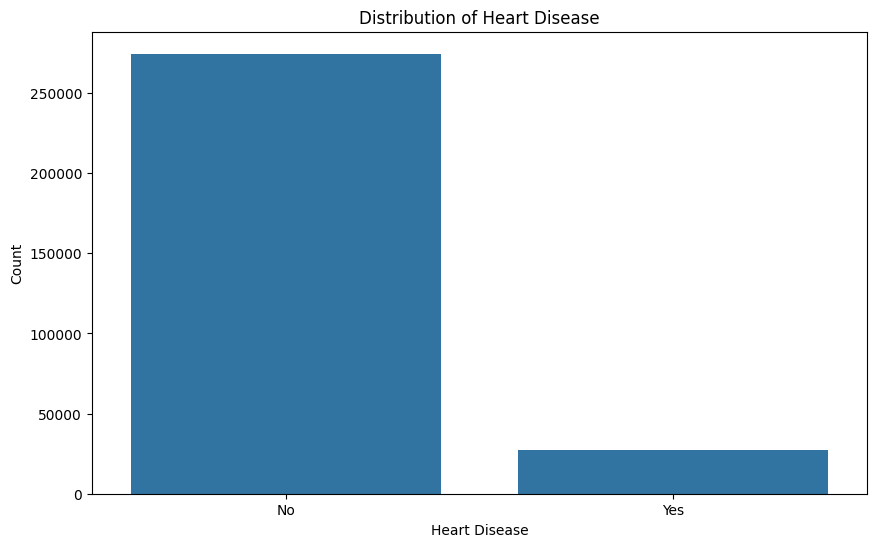

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=count_target.index, y=count_target.values)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


**to see what is inside categorical columns**

In [ ]:
data_categorical = data.select_dtypes(include= 'object')
for col in data_categorical:
  print(f"\nunique values for '{col}': ")
  print(data[col].unique())


unique values for 'HeartDisease': 
['No' 'Yes']

unique values for 'Smoking': 
['Yes' 'No']

unique values for 'AlcoholDrinking': 
['No' 'Yes']

unique values for 'Stroke': 
['No' 'Yes']

unique values for 'DiffWalking': 
['No' 'Yes']

unique values for 'Sex': 
['Female' 'Male']

unique values for 'AgeCategory': 
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']

unique values for 'Race': 
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

unique values for 'Diabetic': 
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

unique values for 'PhysicalActivity': 
['Yes' 'No']

unique values for 'GenHealth': 
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']

unique values for 'Asthma': 
['Yes' 'No']

unique values for 'KidneyDisease': 
['No' 'Yes']

unique values for 'SkinCancer': 
['Yes' 'No']


 calc of outlayers

In [ ]:
upper_limit = data.BMI.mean() + 3 * data.BMI.std()
upper_limit

np.float64(47.84637314010088)

In [ ]:
lower_limit = data.BMI.mean() - 3 * data.BMI.std()
lower_limit

np.float64(9.037567108542717)

 # 2. Handling Outliers Using IQR and Replacing with Median in Encoded Data


In [9]:
data_cleaned = data.copy()

# Step 1: Replace outliers with median
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = data_cleaned[col].median()

    data_cleaned[col] = np.where((data_cleaned[col] < lower) | (data_cleaned[col] > upper), median, data_cleaned[col])



In [ ]:
data_cleaned.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,27.814022,0.403666,1.085143,7.042752
std,5.309631,1.091374,2.377759,1.251074
min,12.650000,0.000000,0.000000,3.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.010000,0.000000,0.000000,8.000000
max,43.080000,5.000000,10.000000,11.000000


In [ ]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']

data_cleaned['BMI_Category'] = pd.cut(data_cleaned['BMI'], bins=bins, labels=labels, right=False)
data_cleaned[['BMI', 'BMI_Category']].head(10)


,BMI,BMI_Category
0,16.60,Underweight
1,20.34,Normal weight
2,26.58,Overweight
3,24.21,Normal weight
4,23.71,Normal weight
5,28.87,Overweight
6,21.63,Normal weight
7,31.64,Obesity I
8,26.45,Overweight
9,40.69,Obesity III


In [ ]:
# عرض توزيع الفئات العمرية للأشخاص المصابين فقط
heart_disease_by_age = data_cleaned[data_cleaned['HeartDisease'] == 'Yes']['AgeCategory'].value_counts()

print(heart_disease_by_age)


AgeCategory
80 or older    5426
70-74          4817
65-69          4074
75-79          4027
60-64          3321
55-59          2199
50-54          1383
45-49           743
40-44           486
35-39           296
30-34           226
25-29           133
18-24           130
Name: count, dtype: int64


In [ ]:
# عرض توزيع الفئات العمرية للأشخاص المصابين فقط
sleeepval = data_cleaned[data_cleaned['HeartDisease'] == 'Yes']['SleepTime'].value_counts()

print(sleeepval)


SleepTime
8.0     8301
7.0     7055
6.0     5415
5.0     2030
9.0     1695
4.0     1180
10.0    1165
3.0      347
11.0      73
Name: count, dtype: int64


In [ ]:
data_cleaned['SleepTime'].value_counts()


,count
SleepTime,
7.0,93987
8.0,90202
6.0,64655
5.0,19101
9.0,15853
10.0,7782
4.0,7730
3.0,1992
11.0,415


In [ ]:
SEXval = data_cleaned[data_cleaned['HeartDisease'] == 'Yes']['Sex'].value_counts()

print(SEXval)


Sex
Male      16048
Female    11213
Name: count, dtype: int64


In [ ]:
pd.crosstab(data['Asthma'], data['HeartDisease'])

HeartDisease,No,Yes
Asthma,,
No,236737,22329
Yes,37719,4932


In [ ]:
data_categorical = data_cleaned.select_dtypes(include= 'object')
for col in data_categorical:
  print(f"\nunique values for '{col}': ")
  print(data_cleaned[col].unique())


unique values for 'HeartDisease': 
['No' 'Yes']

unique values for 'Smoking': 
['Yes' 'No']

unique values for 'AlcoholDrinking': 
['No' 'Yes']

unique values for 'Stroke': 
['No' 'Yes']

unique values for 'DiffWalking': 
['No' 'Yes']

unique values for 'Sex': 
['Female' 'Male']

unique values for 'AgeCategory': 
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']

unique values for 'Race': 
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

unique values for 'Diabetic': 
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

unique values for 'PhysicalActivity': 
['Yes' 'No']

unique values for 'GenHealth': 
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']

unique values for 'Asthma': 
['Yes' 'No']

unique values for 'KidneyDisease': 
['No' 'Yes']

unique values for 'SkinCancer': 
['Yes' 'No']


#Data visialization

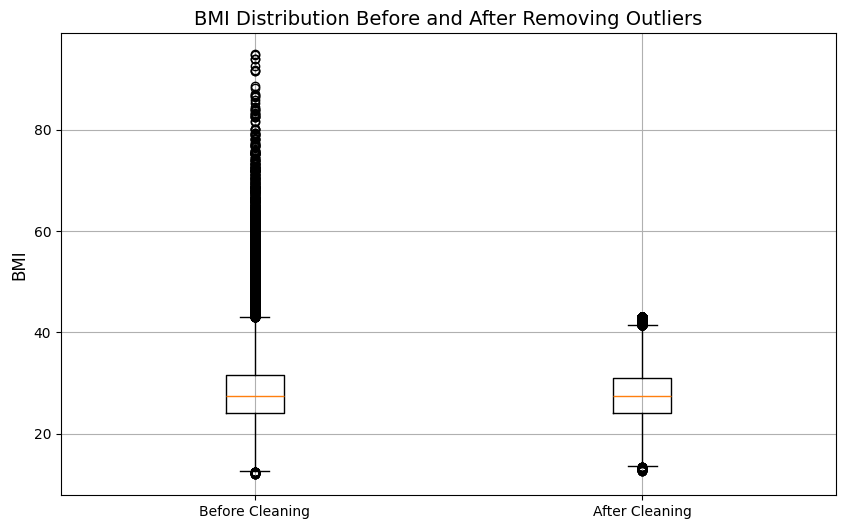

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.boxplot([data['BMI'], data_cleaned['BMI']], labels=['Before Cleaning', 'After Cleaning'])

plt.title('BMI Distribution Before and After Removing Outliers', fontsize=14)
plt.ylabel('BMI', fontsize=12)
plt.grid(True)
plt.show()


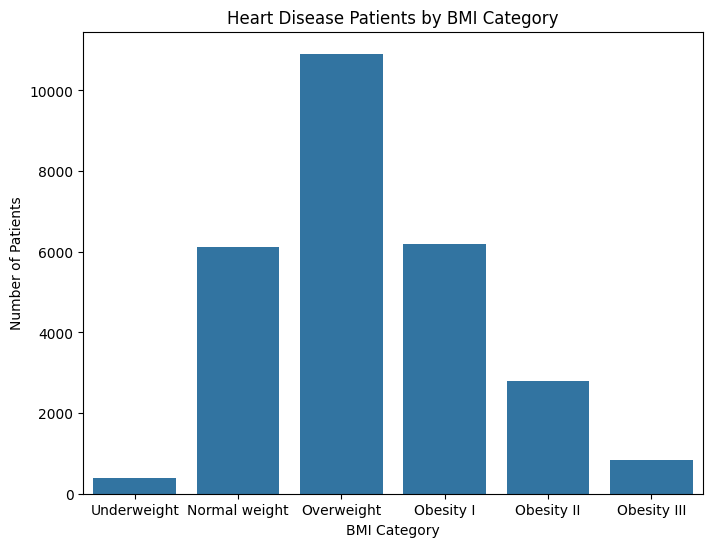

In [ ]:
heart_patients = data_cleaned[data_cleaned['HeartDisease'] == 'Yes']

bmi_heart_counts = heart_patients['BMI_Category'].value_counts().sort_index()

plt.figure(figsize=(8,6))
sns.barplot(x=bmi_heart_counts.index, y=bmi_heart_counts.values)
plt.title('Heart Disease Patients by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Number of Patients')
plt.show()

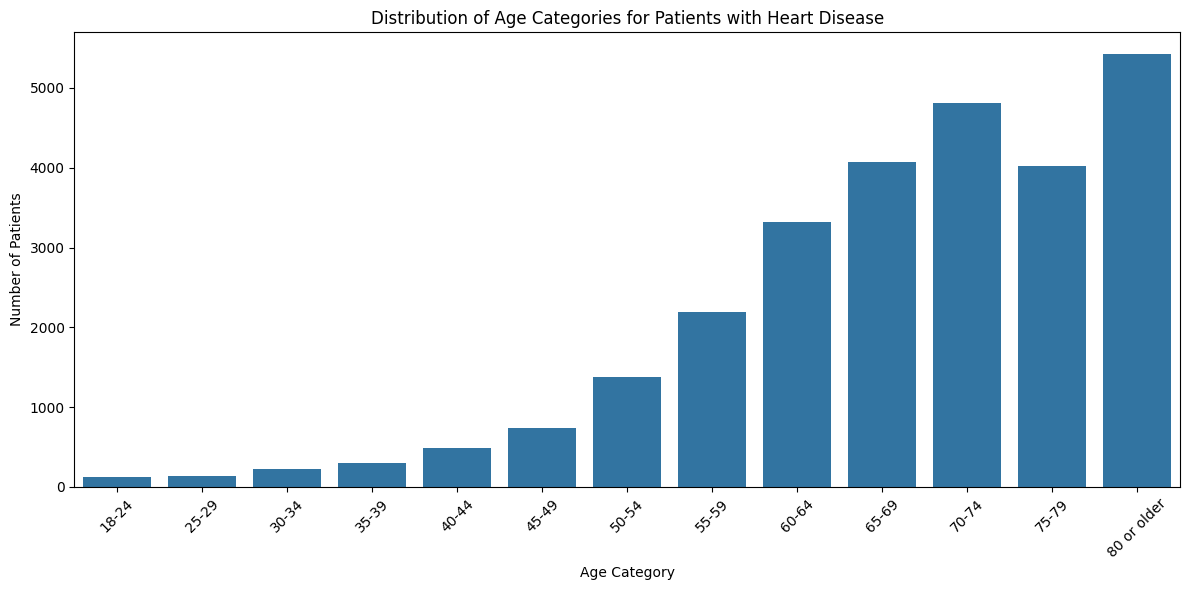

In [ ]:
# Filter for patients with heart disease
heart_disease_patients = data[data["HeartDisease"] == "Yes"]

# Count of patients by AgeCategory
age_counts = heart_disease_patients["AgeCategory"].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=age_counts.index, y=age_counts.values)

plt.title("Distribution of Age Categories for Patients with Heart Disease")
plt.xlabel("Age Category")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
data.groupby("HeartDisease").BMI.mean()

,BMI
HeartDisease,
No,28.345630
Yes,29.411893


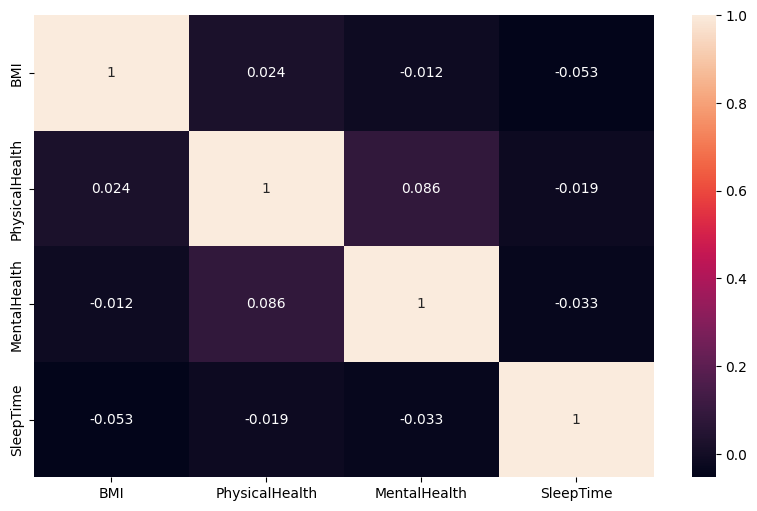

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data_cleaned.corr(numeric_only=True),annot=True)
plt.show()

In [ ]:
data_cleaned = data_cleaned.drop('BMI_Category', axis=1)


KeyError: "['BMI_Category'] not found in axis"

In [ ]:
data_cleaned

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,0.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,0.0,0.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,0.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,0.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,7.0,No,No,No


# 3. Label Encoding of Categorical Columns Excluding {AgeCategory , Race} bcuz it is not binary

In [10]:

# Create a LabelEncoder instance
le = LabelEncoder()

# Make a copy of the original dataset to keep the original data untouched

for col in data_cleaned.columns:
    if col in ['AgeCategory', 'Race']:
      continue  # Skip bcuz it is not binary

    if data_cleaned[col].dtype == 'object':
        data_cleaned[col] = le.fit_transform(data_cleaned[col])

data_cleaned.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,0.0,0,0,55-59,White,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,0.0,0.0,0,1,65-69,White,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,0.0,0.0,1,0,40-44,White,0,1,4,8.0,0,0,0


# Applying Ordinal Encoding to AgeCategory Column Based on Defined Age Ranges

In [11]:
# Step 3: Ordinal encode AgeCategory
age_order = [['18-24', '25-29', '30-34', '35-39', '40-44',
              '45-49', '50-54', '55-59', '60-64', '65-69',
              '70-74', '75-79', '80 or older']]

ordinal_encoder = OrdinalEncoder(categories=age_order)
data_cleaned[['AgeCategory']] = ordinal_encoder.fit_transform(data_cleaned[['AgeCategory']])
data_cleaned.head()



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,0.0,0,0,7.0,White,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12.0,White,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,0.0,0.0,0,1,9.0,White,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11.0,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,0.0,0.0,1,0,4.0,White,0,1,4,8.0,0,0,0


# One-hot encode Race manually


In [12]:
# Step 4: One-hot encode Race manually
races = pd.get_dummies(data_cleaned['Race']).astype(int)
data_cleaned = pd.concat([data_cleaned.drop('Race', axis=1), races], axis=1)

In [ ]:
data_cleaned.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,16.60,1,0,0,3.0,0.0,0,0,7.0,...,5.0,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12.0,...,7.0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,0.0,0.0,0,1,9.0,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,0,11.0,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,0.0,0.0,1,0,4.0,...,8.0,0,0,0,0,0,0,0,0,1


# 4. We drop (uneffected columns and features with strong relations)  based on correlation here

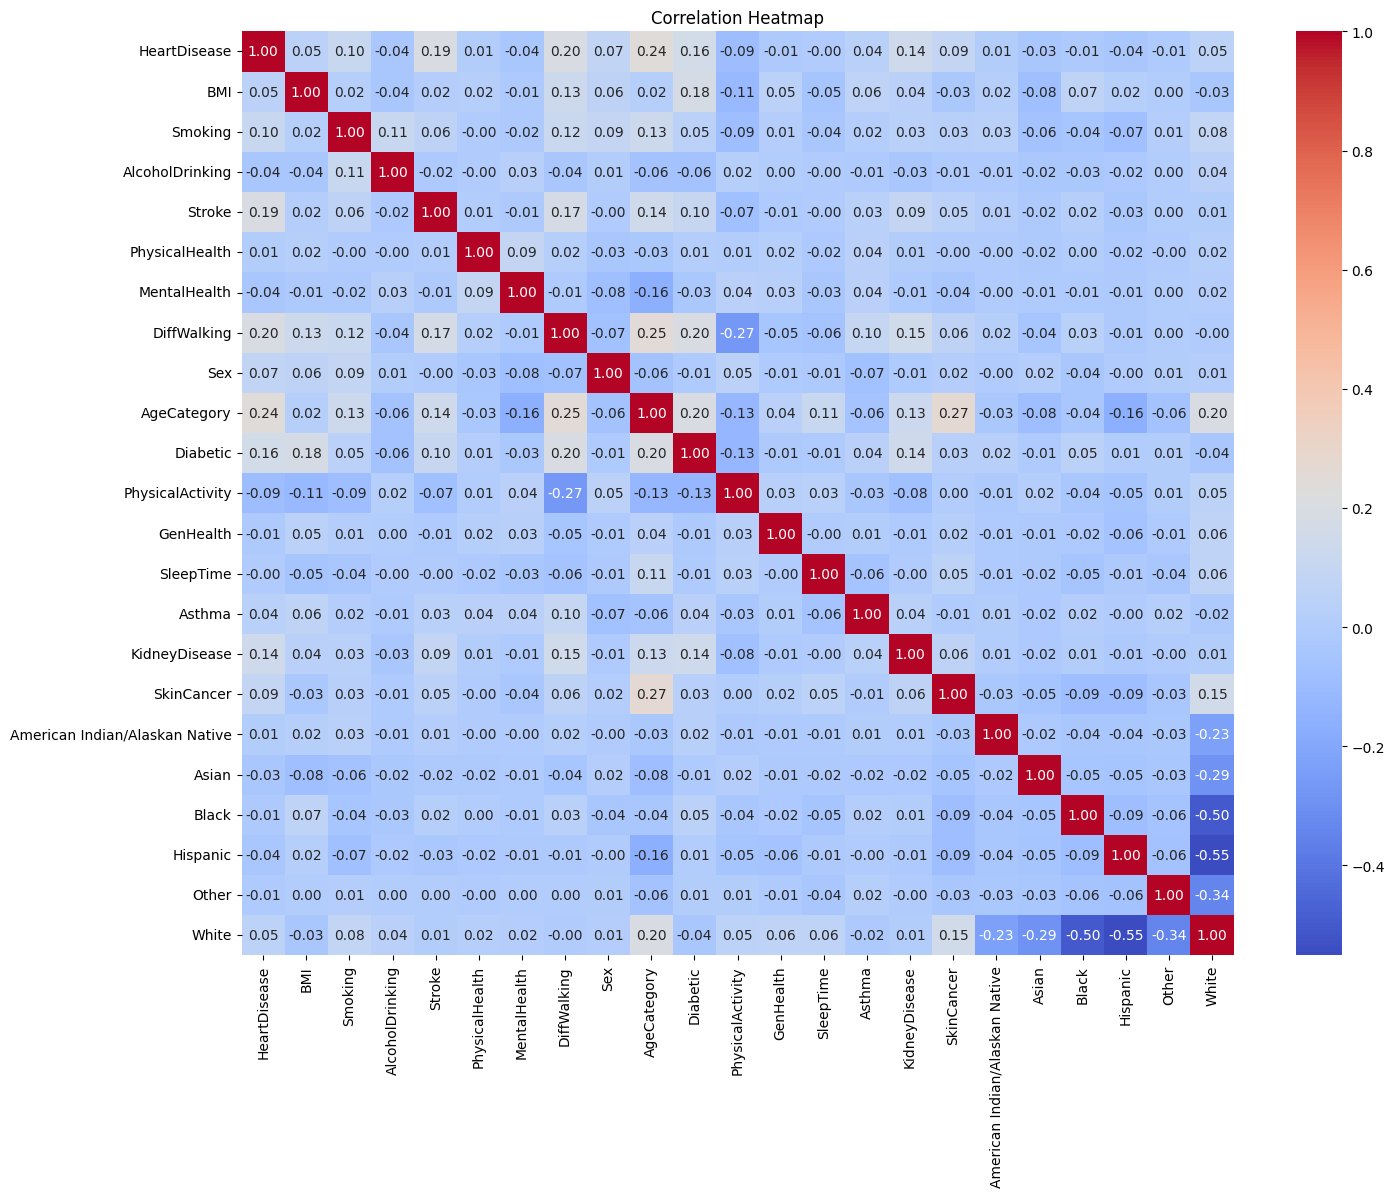

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
correlation_matrix = data_cleaned.corr().abs()

high_corr = [
    (col1, col2, corr_val)
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if col1 != col2 and correlation_matrix.loc[col1, col2] > 0.8
]

if high_corr:
    for col1, col2, corr_val in high_corr:
        print(f"{col1} and {col2} → correlation = {corr_val:.2f}")
else:
    print(" we do not have any strong relations")


 we do not have any strong relations


In [ ]:
#columns_to_drop = ['MentalHealth', 'PhysicalHealth', 'SleepTime', 'Other']
#data_cleaned = data_cleaned.drop(columns=columns_to_drop)

#print(data_cleaned.columns)


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic',
       'White'],
      dtype='object')


In [ ]:
data_cleaned.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,American Indian/Alaskan Native,Asian,Black,Hispanic,White
0,0,16.60,1,0,0,0,0,7.0,2,1,4,1,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0,0,12.0,0,1,4,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,0,1,9.0,2,1,1,1,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0,0,11.0,0,0,2,0,0,1,0,0,0,0,1
4,0,23.71,0,0,0,1,0,4.0,0,1,4,0,0,0,0,0,0,0,1


# 5. Train Test Split

In [13]:
target = 'HeartDisease'

x = data_cleaned.drop(target, axis = 1)
y = data_cleaned[target]



x_train, x_test , y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42,stratify= y)


In [16]:


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Create a Random Forest classifier with tuned hyperparameters
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

#saving model

In [14]:
import joblib

# After training loop
joblib.dump(model, "random_forest_model.pkl")
print("Model saved successfully!")


NameError: name 'model' is not defined

In [15]:
model = joblib.load("random_forest_model.pkl")


FileNotFoundError: [Errno 2] No such file or directory: 'random_forest_model.pkl'

In [ ]:
accuracy_train = model.score(x_train,y_train)
accuracy_train

0.9893139148132147

In [ ]:
accuracy = model.score(x_test,y_test)
accuracy

0.863748982838821

In [ ]:
model.predict_proba(x_test)

array([[0.05, 0.95],
       [0.  , 1.  ],
       [1.  , 0.  ],
       ...,
       [0.07, 0.93],
       [0.01, 0.99],
       [0.91, 0.09]])

In [ ]:
y_predicted = model.predict(x_test)
y_predicted


array([1, 1, 0, ..., 1, 1, 0])

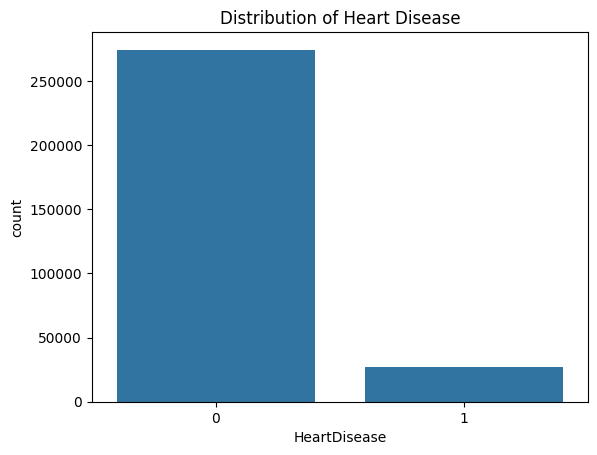

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Distribution of Heart Disease")
plt.show()


#we use confusion matrix and score() (clasification) for accuracy instead of mean absolute error (regresion)

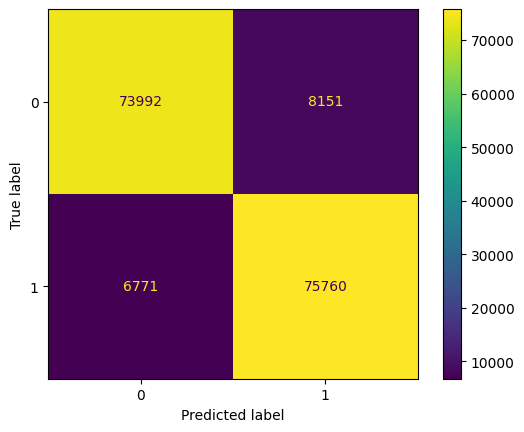

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
#number of errors

In [ ]:
miss_classified = 0
for i in range(len(cm)):
  my_array =  cm[i]
  for j in range(len(my_array)):
    if i == j :
      continue
    else :
      miss_classified = miss_classified + cm[i][j]
miss_classified

np.int64(22437)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.90      0.91     82143
           1       0.90      0.92      0.91     82531

    accuracy                           0.91    164674
   macro avg       0.91      0.91      0.91    164674
weighted avg       0.91      0.91      0.91    164674



In [ ]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)


0.863748982838821

In [ ]:
acc_train, acc_test = [], []

for i in range(3, 33):
    model = RandomForestClassifier(n_estimators=i)  # number of decision trees
    model.fit(x_train, y_train)
    acc_train.append(model.score(x_train, y_train))
    acc_test.append(model.score(x_test, y_test))


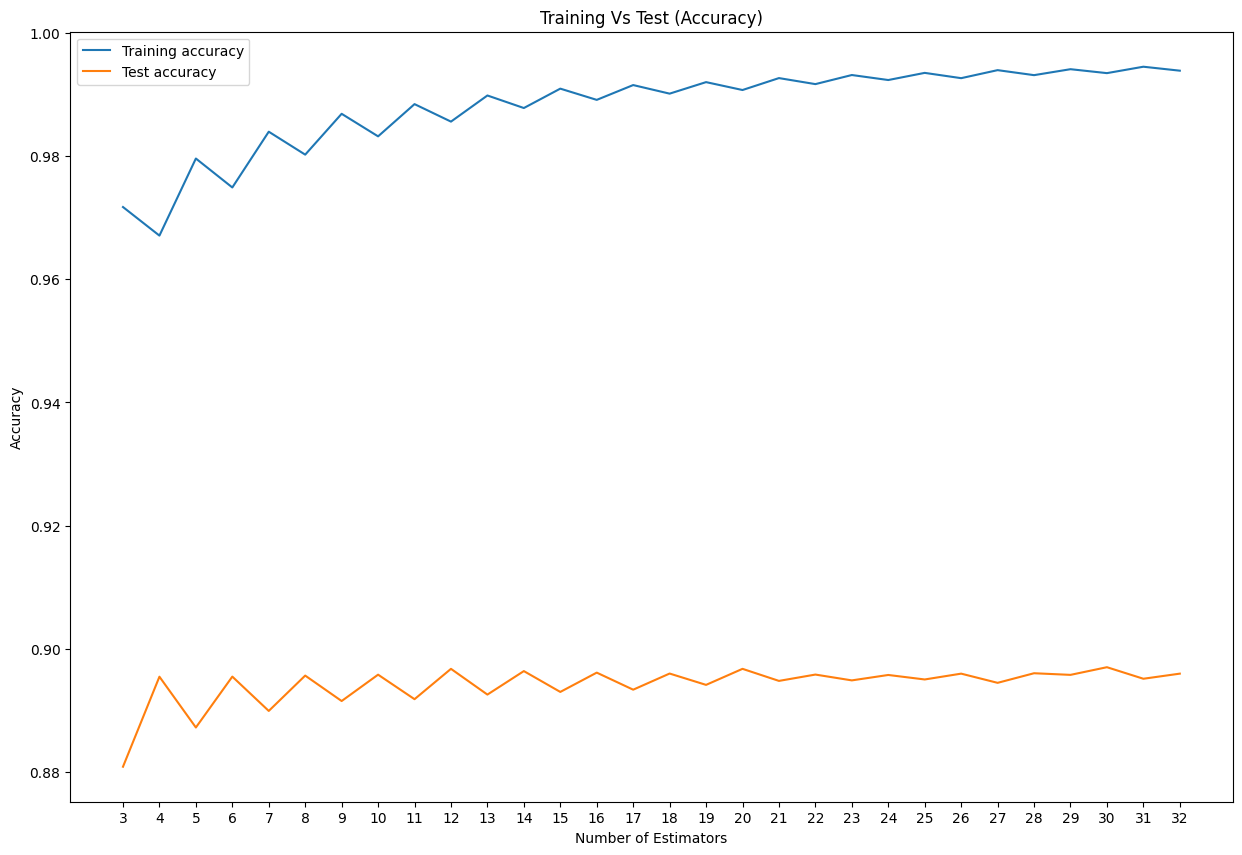

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(range(3, 33), acc_train, label='Training accuracy')
plt.plot(range(3, 33), acc_test, label='Test accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel("Accuracy")
plt.title("Training Vs Test (Accuracy)")
plt.xticks(range(3, 33))
plt.legend()
plt.show()

In [ ]:
model.feature_importances_

array([0.39385308, 0.01653389, 0.00836439, 0.02758508, 0.03620026,
       0.04565152, 0.02870288, 0.02036651, 0.11313632, 0.02935714,
       0.02326992, 0.06776498, 0.10605563, 0.01857282, 0.015463  ,
       0.01626532, 0.00387274, 0.00211996, 0.00651017, 0.00562648,
       0.00507163, 0.00965629])

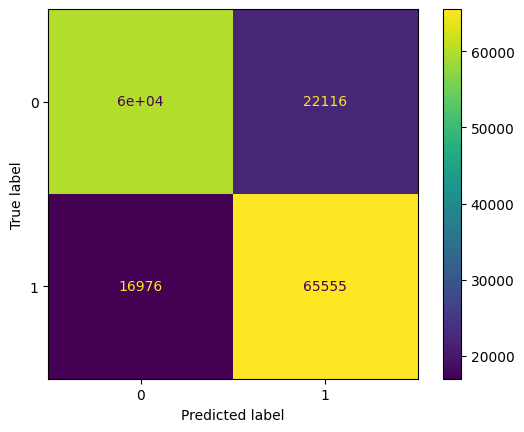

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


ValueError: Found input variables with inconsistent numbers of samples: [60344, 164674]

#Cross_val and store it


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

cross_val_score(RandomForestClassifier(random_state=42), x , y , cv = 3)

array([0.89484255, 0.89753609, 0.8978841 ])

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

cross_val_score(LogisticRegression(), x , y , cv = 3)

array([0.91062214, 0.91071073, 0.90983574])

#grid search for finding best model and best hyber parameter

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

classifier = GridSearchCV(
    svm.SVC(),
    {
        'C': [1, 10, 20],
        'kernel': ['rbf', 'linear']  # correct spelling
    },
    cv=5,
    return_train_score=False
)



In [ ]:
classifier.fit(x, y)


KeyboardInterrupt: 

In [ ]:
classifier.best_params_

In [ ]:
classifier.best_score_

In [ ]:
classifier.best_estimator_